In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv("cardekho_data.csv")

In [39]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [40]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [41]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [42]:
num_col=["Year","Selling_Price","Present_Price","Kms_Driven","Owner"]

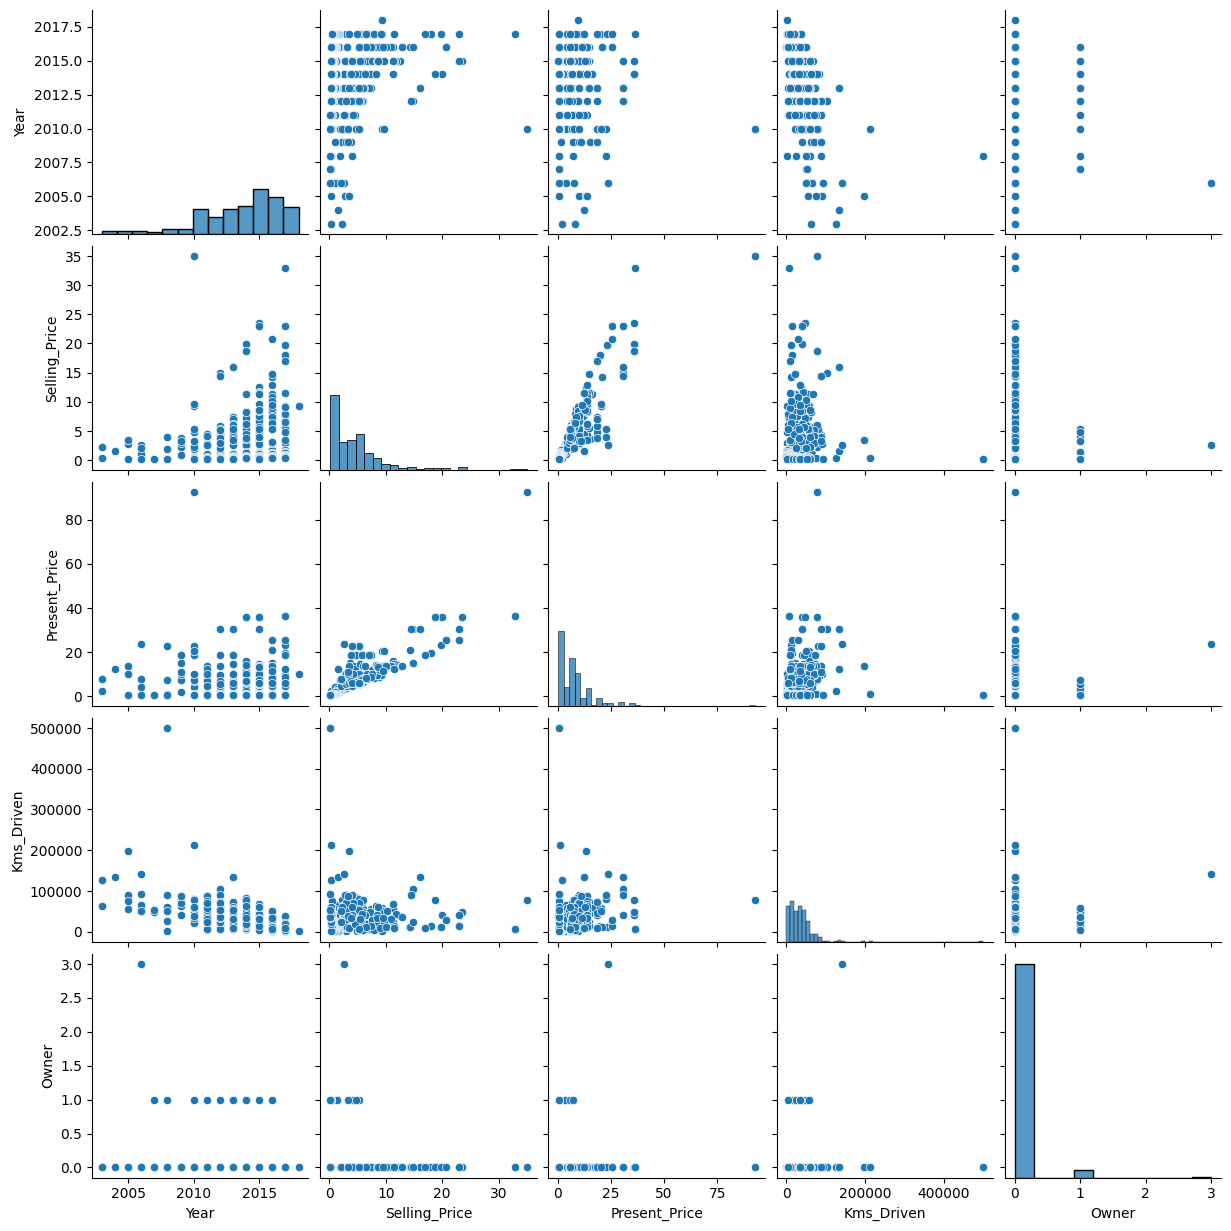

In [43]:
plt.fig_size=(8,8)
sns.pairplot(df[num_col])

<Axes: >

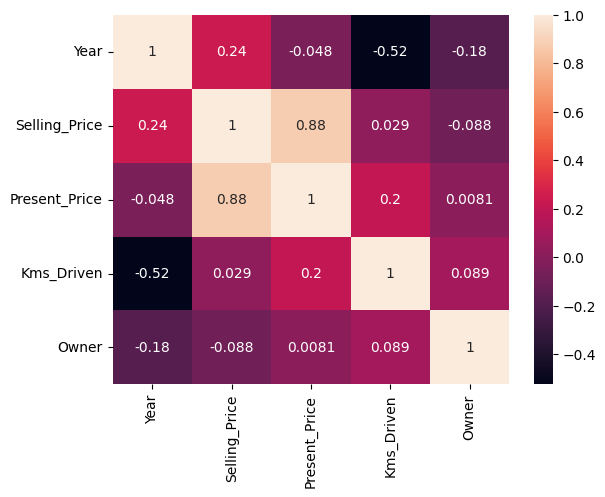

In [44]:
sns.heatmap(df[num_col].corr(),annot=True)

In [45]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [46]:
cat_cols=["Fuel_Type","Seller_Type","Transmission"]

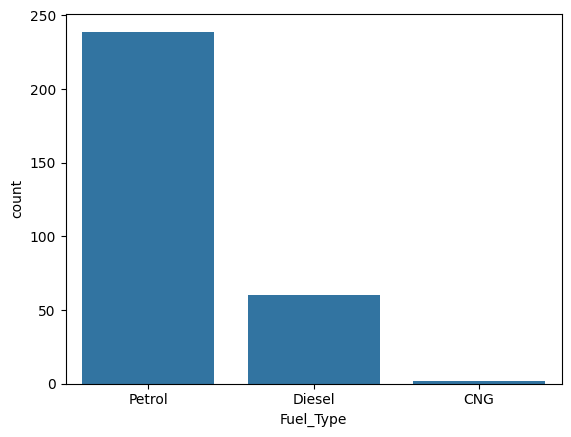

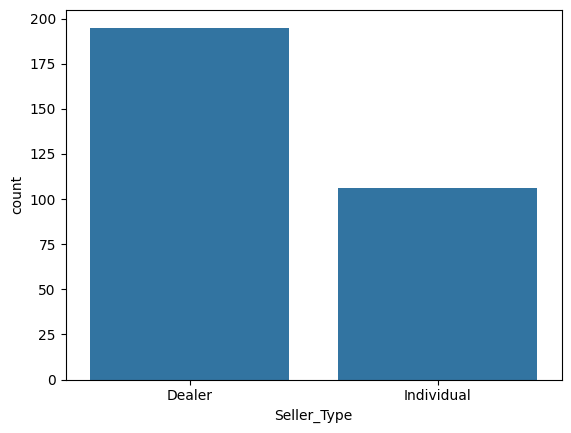

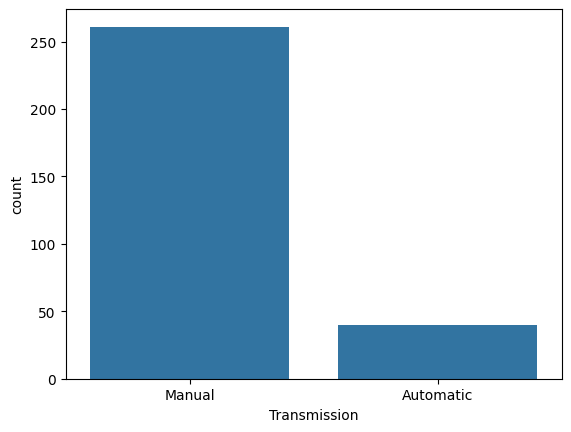

In [47]:
for i in cat_cols:
  sns.countplot(x=df[i])
  plt.show()

In [48]:
df.drop(columns='Car_Name',inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
label=LabelEncoder()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [52]:
for i in df.select_dtypes(include=['object']).columns:
  df[i]=label.fit_transform(df[i])

In [53]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [54]:
# df.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# df.replace({"Seller_Type":{'Dealer':0,'Individual':1}},inplace=True)
# df.replace({"Transmission":{'Manual':0,'Automatic':1}},inplace=True)

In [55]:
x=df.drop(columns='Selling_Price')
y=df['Selling_Price']

In [56]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
model=RandomForestRegressor(random_state=42)

In [60]:
model1=model.fit(x_train,y_train)

In [61]:
y_pred=model.predict(x_test)

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_test,y_pred)

0.9616981508899042

In [64]:
param={
    "n_estimators":[100,200,300,400,500],
    "max_depth":[None,5,10,15,20],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [65]:
random=RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),param_distributions=param,cv=3,n_iter=20,n_jobs=-1,verbose=1)

In [66]:
random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=1)

In [67]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=1)

In [68]:
estimators=random.best_estimator_

In [69]:
y_best=estimators.predict(x_test)

In [70]:
r2_score(y_test,y_best)

0.9635303390155866

In [74]:
import joblib
joblib.dump(model1,"car_price_prediction.pkl")

['car_price_prediction.pkl']

In [75]:
model=joblib.load("car_price_prediction.pkl")

In [76]:
import json

# Save parameters in JSON
with open("rf_params.json", "w") as f:
    json.dump(model1.get_params(), f)